### Import tools

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle as pkl
import csv

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

### Load the data

In [2]:
df_labels= pd.read_csv("../input/traffic-signs-preprocessed/label_names.csv")
train_imgs= pkl.load(open("../input/traffic-signs-preprocessed/train.pickle", "rb"))
test_imgs= pkl.load(open("../input/traffic-signs-preprocessed/test.pickle", "rb"))
valid_imgs= pkl.load(open("../input/traffic-signs-preprocessed/valid.pickle", "rb"))

labels= pkl.load(open("../input/traffic-signs-preprocessed/labels.pickle", "rb"))

In [3]:
# Printing the labels
dict={}
reader= csv.reader(labels)

i=0

for row in reader:
    i+=1
    dict[i]= row[0]

print(dict)

{1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)', 4: 'Speed limit (60km/h)', 5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)', 7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)', 9: 'Speed limit (120km/h)', 10: 'No passing', 11: 'No passing for vehicles over 3.5 metric tons', 12: 'Right-of-way at the next intersection', 13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles', 17: 'Vehicles over 3.5 metric tons prohibited', 18: 'No entry', 19: 'General caution', 20: 'Dangerous curve to the left', 21: 'Dangerous curve to the right', 22: 'Double curve', 23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right', 26: 'Road work', 27: 'Traffic signals', 28: 'Pedestrians', 29: 'Children crossing', 30: 'Bicycles crossing', 31: 'Beware of ice/snow', 32: 'Wild animals crossing', 33: 'End of all speed and passing limits', 34: 'Turn right ahead', 35: 'Turn left ahead', 36: 'Ahead only', 37: 'Go straight or right', 38: 'Go straight 

### Split the images

In [4]:
X_train= train_imgs["features"]
y_train= train_imgs["labels"]

X_val= valid_imgs["features"]
y_val= valid_imgs["labels"]

X_test= test_imgs["features"]
y_test= test_imgs["labels"]

In [5]:
def shapes(X, y):

    print("X: ", X.shape)
    print("y: ", y.shape)
    

shapes(X_train, y_train)
shapes(X_val, y_val)
shapes(X_test, y_test)

X:  (34799, 32, 32, 3)
y:  (34799,)
X:  (4410, 32, 32, 3)
y:  (4410,)
X:  (12630, 32, 32, 3)
y:  (12630,)


### Visualize the data

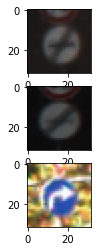

In [6]:
fig, ax= plt.subplots(3)

ax[0].imshow(X_train[0])
ax[1].imshow(X_val[10])
ax[2].imshow(X_test[3])

### Model Evaluation

In [7]:
model= Sequential([
    
    Conv2D(32, kernel_size=(3, 3), input_shape=(32, 32, 3),
           activation= "relu"),

    MaxPooling2D(2, 2),
    
    Dropout(0.2),
    
    Conv2D(64, kernel_size=(3, 3),
           activation="relu"),
    
    MaxPooling2D(2, 2),
    
    Dropout(0.2),
    
    Flatten(),
    
    Dense(256, activation="relu"),
    
    Dropout(0.2),
    
    Dense(128, activation="relu"),
    
    Dropout(0.2),
    
    Dense(64, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [9]:
reduceLr= ReduceLROnPlateau(monitor= "val_loss", 
                            factor= 0.3, mode= min, 
                            verbose=1, min_lr= 1e-5)

checkpoint= ModelCheckpoint("trafficModel.h5", save_best_only= True,
                            monitor= "val_loss", mode="min")

earlyStopping= EarlyStopping(monitor= "val_loss", restore_best_weights= True,
                             patience= 5, mode= "min")


In [10]:
hist= model.fit(X_train, y_train, epochs=20,
                validation_data=(X_test, y_test), batch_size=32,
                callbacks=[earlyStopping, checkpoint, reduceLr])


Epoch 1/20
1088/1088 [==============================] - 30s 27ms/step - loss: 4.2680 - accuracy: 0.2899 - val_loss: 0.5961 - val_accuracy: 0.8346
Epoch 2/20
1088/1088 [==============================] - 29s 27ms/step - loss: 0.6213 - accuracy: 0.8190 - val_loss: 0.3574 - val_accuracy: 0.9089
Epoch 3/20
1088/1088 [==============================] - 29s 27ms/step - loss: 0.3418 - accuracy: 0.9034 - val_loss: 0.3466 - val_accuracy: 0.9135
Epoch 4/20
1088/1088 [==============================] - 29s 26ms/step - loss: 0.2653 - accuracy: 0.9246 - val_loss: 0.3101 - val_accuracy: 0.9245
Epoch 5/20
1088/1088 [==============================] - 29s 26ms/step - loss: 0.2363 - accuracy: 0.9349 - val_loss: 0.3080 - val_accuracy: 0.9336
Epoch 6/20
1088/1088 [==============================] - 29s 27ms/step - loss: 0.2073 - accuracy: 0.9439 - val_loss: 0.3695 - val_accuracy: 0.9154
Epoch 7/20
1088/1088 [==============================] - 29s 27ms/step - loss: 0.2246 - accuracy: 0.9420 - val_loss: 0.3578 -

### Plot the `accuracy` of the model

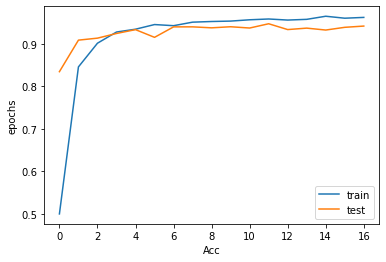

In [11]:
plt.plot(hist.history["accuracy"], label="train")
plt.plot(hist.history["val_accuracy"], label= "validation")
plt.xlabel("Acc")
plt.ylabel("epochs")

plt.legend(["train", "test"])